# DBSCAN demo

Example script to test the DBSCAN clustering methods. DBSCAN demo from https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
Great video explaining DBSCAN: https://www.youtube.com/watch?v=RDZUdRSDOok

In [1]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

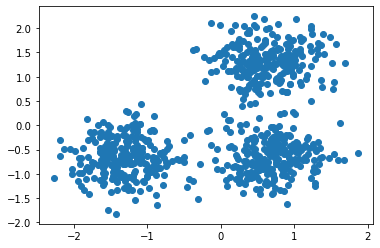

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
db = DBSCAN(eps=0.5, min_samples=50).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 3


In [5]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.954
Completeness: 0.936
V-measure: 0.945
Adjusted Rand Index: 0.970
Adjusted Mutual Information: 0.945
Silhouette Coefficient: 0.623


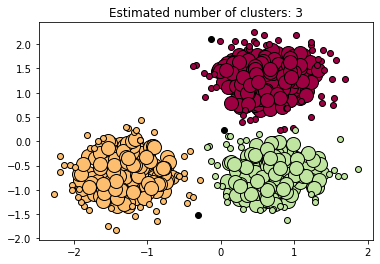

In [6]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# HDBSCAN Demo
Now demo hdbscan: https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html
Great video explaining this concept: https://www.youtube.com/watch?v=dGsxd67IFiU

In [7]:
from sklearn.datasets import make_blobs
import pandas as pd
import hdbscan

In [8]:
blobs, labels = make_blobs(n_samples=2000, n_features=2, centers=6)
pd.DataFrame(blobs).head()

0         1
0  8.502475 -7.506227
1 -1.778516 -4.092101
2 -1.989854  0.775204
3  4.755678  3.834500
4 -4.300168 -8.804036

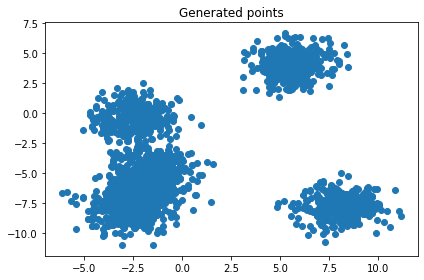

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(blobs[:, 0], blobs[:, 1])
ax.set_title('Generated points')
plt.tight_layout()
plt.show()

In [10]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=25, min_samples=None, p=None)
clusterer.fit(blobs)

C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(min_cluster_size=25)

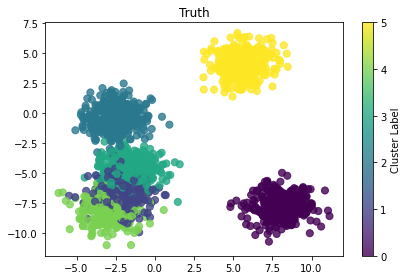

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(blobs[:, 0], blobs[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Truth')

plt.tight_layout()
plt.show()

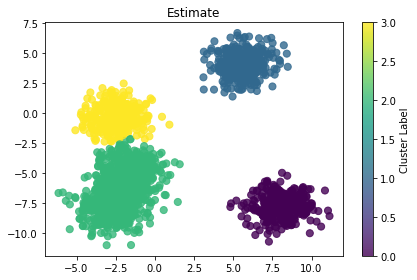

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(blobs[:, 0], blobs[:, 1], c=clusterer.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Estimate')

plt.tight_layout()
plt.show()

Now add noise.

In [13]:
# Number of noise points
n_noise = 1000

# Random 2D points within the blob range
x_min, x_max = blobs[:, 0].min(), blobs[:, 0].max()
y_min, y_max = blobs[:, 1].min(), blobs[:, 1].max()

noise_points = np.random.uniform(low=[x_min, y_min], high=[x_max, y_max], size=(n_noise, 2))
noise_labels = np.full(n_noise, -1)  # label -1 for noise

# Combine blobs and noise
all_points = np.vstack([blobs, noise_points])
all_labels = np.hstack([labels, noise_labels])

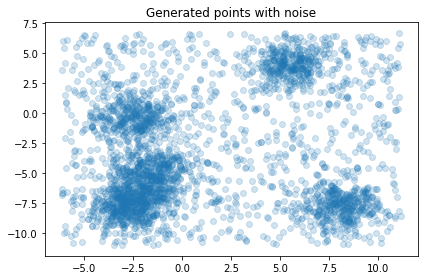

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(all_points[:, 0], all_points[:, 1], alpha=0.2)
ax.set_title('Generated points with noise')
plt.tight_layout()
plt.show()

In [15]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=25, min_samples=None, p=None)
clusterer.fit(all_points)

C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(min_cluster_size=25)

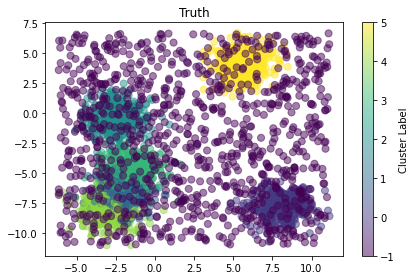

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(all_points[:, 0], all_points[:, 1], c=all_labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Truth')

plt.tight_layout()
plt.show()

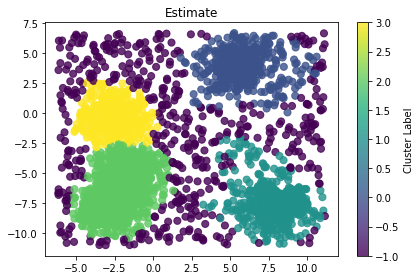

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(all_points[:, 0], all_points[:, 1], c=clusterer.labels_, cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('Estimate')

plt.tight_layout()
plt.show()

# Apply to CoBaLT data

Load in scatter plot.

In [523]:
# Imports and project root setup
import sys
import yaml
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

# Determine project root: prefer __file__ when available (script), otherwise search upward for 'config/preprocessing.yaml'
def find_project_root(start_path: Path = Path.cwd()):
    p = start_path.resolve()
    for parent in [p] + list(p.parents):
        if (parent / 'config' / 'preprocessing.yaml').exists():
            return parent
    return start_path.resolve()

try:
    project_root = Path(__file__).resolve().parent.parent
except NameError:
    project_root = find_project_root()

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# (Optional) configure matplotlib interactive backend, if you want interactive selectors in this notebook
# Uncomment one of the following depending on your environment:
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

# Import the DataPreprocessor class from the package
from processing.data_preprocessor_v2 import DataPreprocessor
from processing.processing_methods.data_loader import DataLoader
from processing.processing_methods.data_plotter import DataPlotter
from processing.processing_methods.data_processor import DataProcessor

# Load configuration and create the DataPreprocessor instance
config_path = project_root / 'config' / 'preprocessing_hdbscan.yaml'
with open(config_path) as f:
    config = yaml.safe_load(f)


In [524]:
dp = DataPreprocessor(config)
dp.loader = DataLoader(config)
dp.plotter = DataPlotter(config)
dp.processor = DataProcessor(config)

In [525]:
dp.loader.preprocess()

Detected Windows data directory: C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Cloud Measurements\First Light
Measurement time (behind 1 hour): 2025-12-02 20:22:04

Preprocessed data file(s) found. No need to create new one(s)...


Locating and loading relevant netcdf data chunks...

Including chunk #0: 0.00–7.01s overlaps 3.75–4.00s
File loaded.

✅ Full time range 3.75–4.00s covered by loaded chunks.
Loaded 1 files
Num points: 14361924

Starting to generate scatter plot...
Finished generating plot.
Time elapsed: 0.9 s
Starting to save image...
Finished saving plot.
Time elapsed: 1.8 s


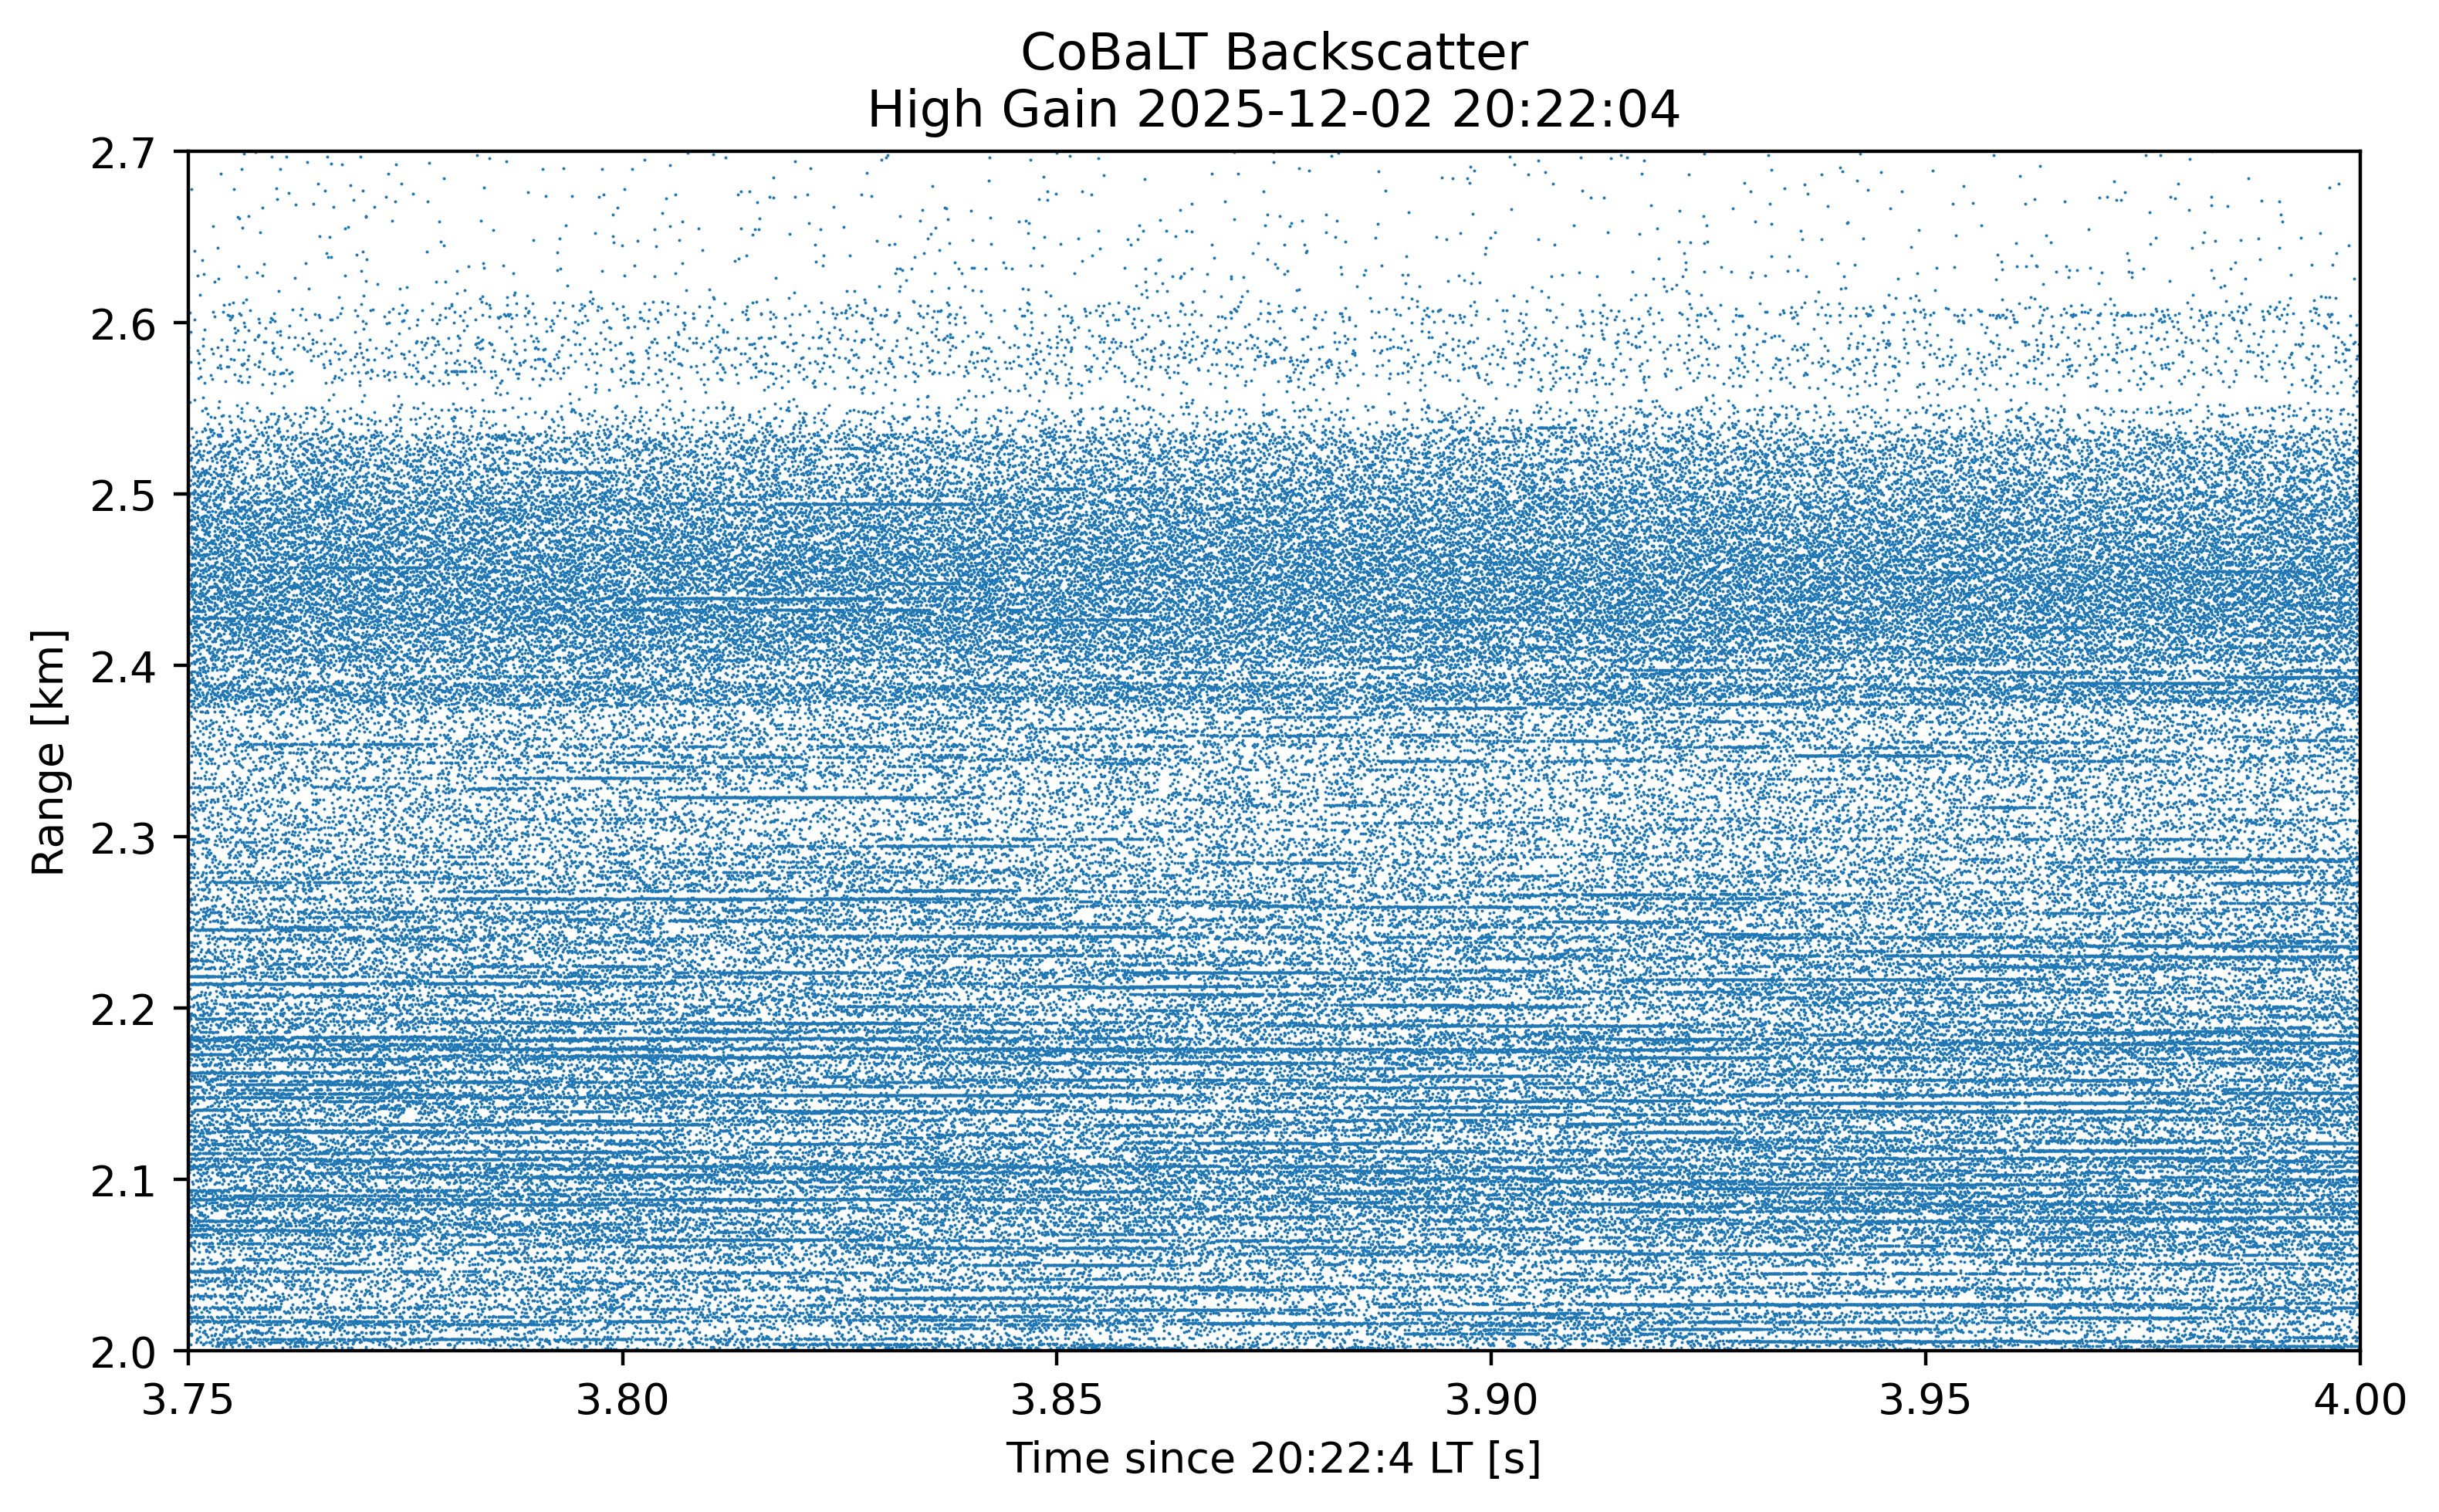

In [526]:
dp.plotter.plot_scatter(dp.loader)

In [527]:
dp.loader.load_chunk()

ranges = np.concatenate([da.values.ravel() for da in dp.loader.ranges_tot])
shots_time = np.concatenate([da.values.ravel() for da in dp.loader.shots_time_tot])

Locating and loading relevant netcdf data chunks...

Including chunk #0: 0.00–7.01s overlaps 3.75–4.00s
File loaded.

✅ Full time range 3.75–4.00s covered by loaded chunks.
Loaded 1 files


In [528]:
r0, r1 = dp.loader.ylim[0] * 1e3, dp.loader.ylim[1] * 1e3  # [km]
t0, t1 = dp.loader.xlim[0], dp.loader.xlim[1]  # [s]

mask = (
    (ranges >= r0) & (ranges <= r1) &
    (shots_time  >= t0) & (shots_time  <= t1)
)

filtered_ranges = ranges[mask]
filtered_times  = shots_time[mask]

print("Number of points: {}".format(filtered_ranges.size))

Number of points: 372342


In [529]:
CoBaLT_blobs = np.array([filtered_times, filtered_ranges]).T

# start = time.time()

# clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=False, leaf_size=40,
#     metric='euclidean', min_cluster_size=40, min_samples=250, p='euclidean')
# clusterer.fit(CoBaLT_blobs)

# print('Time elapsed: {:.2f} s'.format(time.time() - start))

In [538]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(CoBaLT_blobs)
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

start = time.time()

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=5, min_samples=100, p='euclidean')
clusterer.fit(X_reduced)

print('Time elapsed: {:.2f} s'.format(time.time() - start))

X_original = scaler.inverse_transform(X_scaled)

C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Grant\anaconda3\envs\arsenl-conda\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Time elapsed: 46.72 s


Num clusters: 7


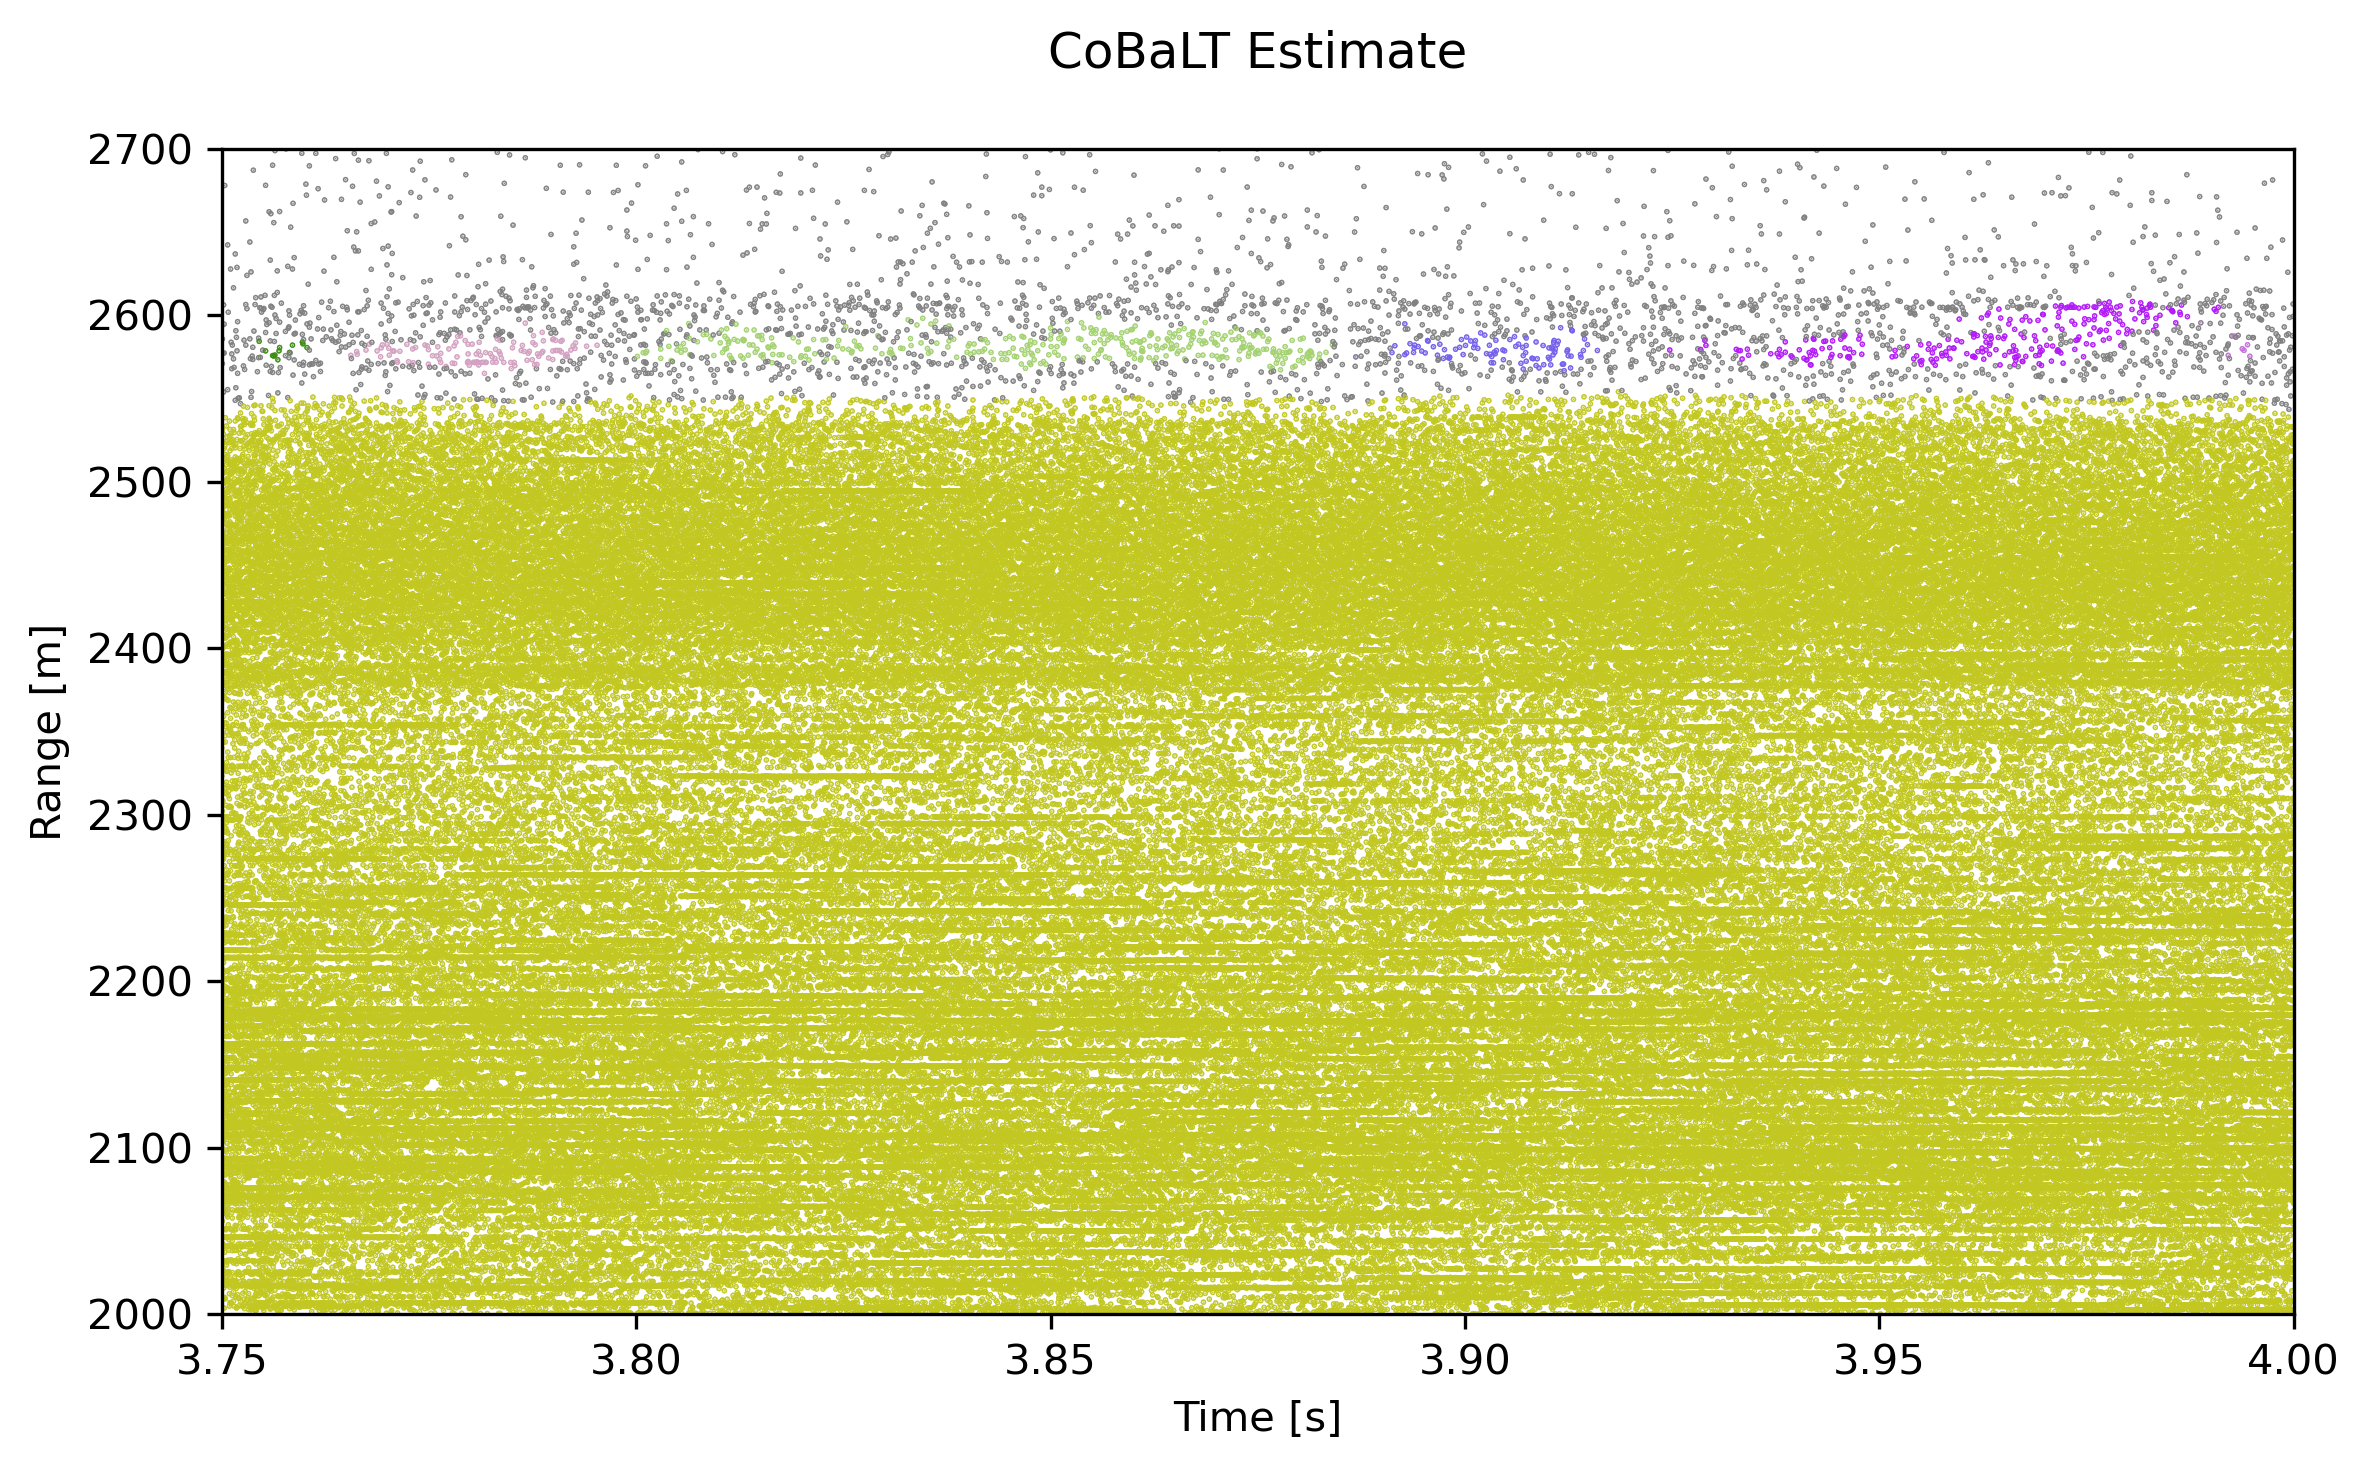

In [539]:
fig = plt.figure(figsize=(8, 5), dpi=300)
ax = fig.add_subplot(111)

labels = clusterer.labels_
unique_labels = np.unique(labels)

# Separate noise (-1) from real clusters
cluster_labels = unique_labels[unique_labels >= 0]
print('Num clusters: {}'.format(len(cluster_labels)))

# Generate random colors for real clusters
rng = np.random.default_rng(42)  # reproducible
colors = rng.random((len(cluster_labels), 3))

# Assign colors
label_to_color = {label: colors[i] for i, label in enumerate(cluster_labels)}

# Add a fixed color for noise
noise_color = np.array([0.5, 0.5, 0.5])  # gray
label_to_color[-1] = noise_color

# Build per-point color array
point_colors = np.array([label_to_color[label] for label in labels])

# scatter = ax.scatter(CoBaLT_blobs[:, 0], CoBaLT_blobs[:, 1], c=point_colors, cmap='viridis', s=5, alpha=0.8)
scatter = ax.scatter(X_original[:, 0], X_original[:, 1], c=point_colors, cmap='viridis', s=0.1, alpha=0.8)
# plt.colorbar(scatter, ax=ax, label='Cluster Label')
ax.set_title('CoBaLT Estimate\n')
ax.set_ylabel('Range [m]')
ax.set_xlabel('Time [s]')
ax.set_xlim([t0, t1])
ax.set_ylim([r0, r1])

plt.tight_layout()
plt.show()